### Imports

In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
def interpret_confusion_matrix(matrix, title, labels):
    encode, correct, errors, total = [],[],[],[]
    i=0
    for row in matrix:
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),cells=dict(values=[labels, correct, errors, total]))])
    fig.update_layout(title= title,width=650,height=400)

    fig.show()


labels = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

df = pd.read_csv("data/DataEncoded.csv")

### Train Test Split

In [5]:
X = df.drop(["NObeyesdad"], axis=1)
Y = df["NObeyesdad"]

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Single Layer Perceptron

Cross Validation Score: 0.3688751033912324
Precision Score: 0.8575299486872021
Recall Score: 0.2603092783505155
F1 score: 0.21136990588796015
Accuracy: 0.2603092783505155


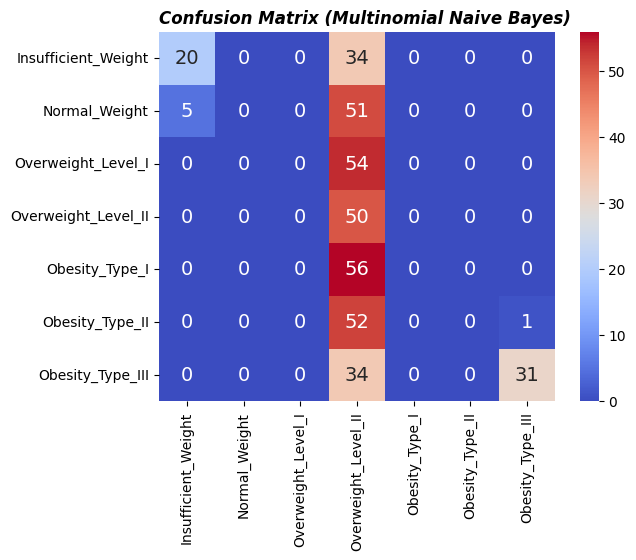

In [6]:

clf = Perceptron(random_state=42)
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)


cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted", zero_division=1)
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multinomial Naive Bayes)",loc='left', fontweight='bold',  style='italic')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Single Layer Perceptron", labels)

### Multi Layer Perceptron

#### Stochastic Gradient Descent

Cross Validation Score: 0.6396153846153846
Precision Score: 0.6054371090408768
Recall Score: 0.5644329896907216
F1 score: 0.5203764916604371
Accuracy: 0.5644329896907216


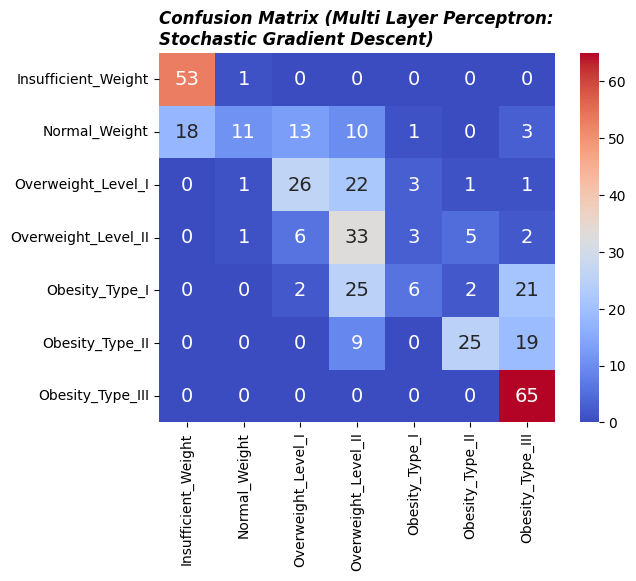

In [16]:

clf = MLPClassifier(solver="sgd", random_state=42, max_iter=1000)
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multi Layer Perceptron: \nStochastic Gradient Descent)",loc='left', fontweight='bold',  style='italic')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Multi Layer Perceptron → Stochastic Gradient Descent", labels)



#### Adam's Gradient Descent

Cross Validation Score: 0.8175227460711332
Precision Score: 0.8529222654887855
Recall Score: 0.8556701030927835
F1 score: 0.8523355921963754
Accuracy: 0.8556701030927835


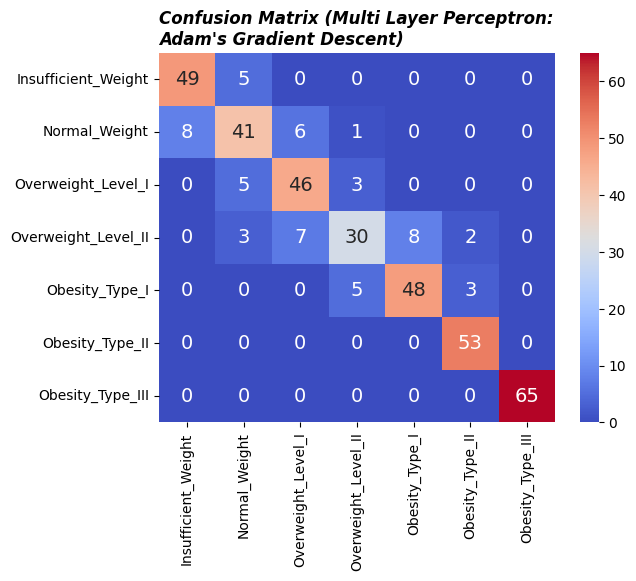

In [15]:

clf = MLPClassifier(solver="adam", random_state=42, max_iter=1000)
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")

sns.heatmap(pd.DataFrame(cf_matrix, labels, labels), annot=True, annot_kws={"size": 14},cmap = 'coolwarm') # font size
plt.title("Confusion Matrix (Multi Layer Perceptron: \nAdam's Gradient Descent)",loc='left', fontweight='bold',  style='italic')
plt.show()


interpret_confusion_matrix(confusion_matrix(yTest,yPred), "Multi Layer Perceptron → Adam's Gradient Descent", labels)



In [19]:
cols = df.columns.drop(["NObeyesdad"])
good_attributes = []
last_max = 0
while cols.size > 0:
  max_score = 0
  max_attribute = ""
  for attribute in cols:
    ok_attributes = good_attributes + [attribute]
    X = df[ok_attributes]
    Y = df["NObeyesdad"]
    
    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    clf = MLPClassifier(solver="adam", random_state=42, max_iter=10000)
    clf.fit(xTrain,yTrain)
    yPred = clf.predict(xTest)
    score = accuracy_score(yTest,yPred)
    
    if abs(score) > max_score:
      max_attribute = attribute
      max_score = abs(score)
    print(score, ok_attributes)    
  if last_max > max_score:
    break
  last_max = max_score
  good_attributes.append(max_attribute)
  cols = cols.drop(max_attribute)

print(f"Optimal attribute count:{len(good_attributes)}\nOptimal attributes: {good_attributes}\n")

X = df[good_attributes]
Y = df["NObeyesdad"]
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)


clf = MLPClassifier(solver="adam", random_state=42, max_iter=1000)
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)

cv_score = np.array(cross_val_score(clf, xTrain,yTrain, cv=10)).mean()
cf_matrix = confusion_matrix(yTest,yPred)
metrics = precision_recall_fscore_support(yTest,yPred,average="weighted")
precision,recall,f1=metrics[0],metrics[1],metrics[2]
accuracy = accuracy_score(yTest,yPred)
print(f"Cross Validation Score: {cv_score}\nPrecision Score: {precision}\nRecall Score: {recall}\nF1 score: {f1}\nAccuracy: {accuracy}")


0.31443298969072164 ['Gender']
0.32216494845360827 ['Age']
0.24742268041237114 ['Height']
0.43041237113402064 ['Weight']
0.2190721649484536 ['family_history_with_overweight']
0.18556701030927836 ['FAVC']
0.28865979381443296 ['FCVC']
0.2706185567010309 ['NCP']
0.23195876288659795 ['CAEC']
0.15463917525773196 ['SMOKE']
0.25773195876288657 ['CH2O']
0.17268041237113402 ['SCC']
0.23969072164948454 ['FAF']
0.29896907216494845 ['TUE']
0.2190721649484536 ['CALC']
0.21649484536082475 ['MTRANS']
0.6623711340206185 ['Weight', 'Gender']
0.5618556701030928 ['Weight', 'Age']
0.5515463917525774 ['Weight', 'Height']
0.4690721649484536 ['Weight', 'family_history_with_overweight']
0.43041237113402064 ['Weight', 'FAVC']
0.5747422680412371 ['Weight', 'FCVC']
0.5360824742268041 ['Weight', 'NCP']
0.44587628865979384 ['Weight', 'CAEC']
0.4639175257731959 ['Weight', 'SMOKE']
0.44587628865979384 ['Weight', 'CH2O']
0.46134020618556704 ['Weight', 'SCC']
0.5128865979381443 ['Weight', 'FAF']
0.47680412371134023 ['